In [76]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [77]:
data = pd.read_csv('heart.csv')

In [78]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [79]:
print(data.isna().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [91]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False)
# Choose the columns for One-Hot code
categorical_feature = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
data_encoded = pd.get_dummies(data, columns = categorical_feature)

print("Pre-processed class :")
print(data_encoded)

Pre-processed class :
     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0     40        140          289          0    172      0.0             0   
1     49        160          180          0    156      1.0             1   
2     37        130          283          0     98      0.0             0   
3     48        138          214          0    108      1.5             1   
4     54        150          195          0    122      0.0             0   
..   ...        ...          ...        ...    ...      ...           ...   
913   45        110          264          0    132      1.2             1   
914   68        144          193          1    141      3.4             1   
915   57        130          131          0    115      1.2             1   
916   57        130          236          0    174      0.0             1   
917   38        138          175          0    173      0.0             0   

     Sex_F  Sex_M  ChestPainType_ASY  ...  ChestPainT

In [16]:
data_encoded.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [56]:
# Normalization
scaler = MinMaxScaler(feature_range=(0, 1))
dataEncode_rescaled = scaler.fit_transform(data_encoded)
dataEncode_rescaled = pd.DataFrame(data = dataEncode_rescaled, columns = data_encoded.columns)
dataEncode_rescaled.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.70,0.479270,0.0,0.788732,0.295455,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.428571,0.80,0.298507,0.0,0.676056,0.409091,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.183673,0.65,0.469320,0.0,0.267606,0.295455,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.408163,0.69,0.354892,0.0,0.338028,0.465909,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.530612,0.75,0.323383,0.0,0.436620,0.295455,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


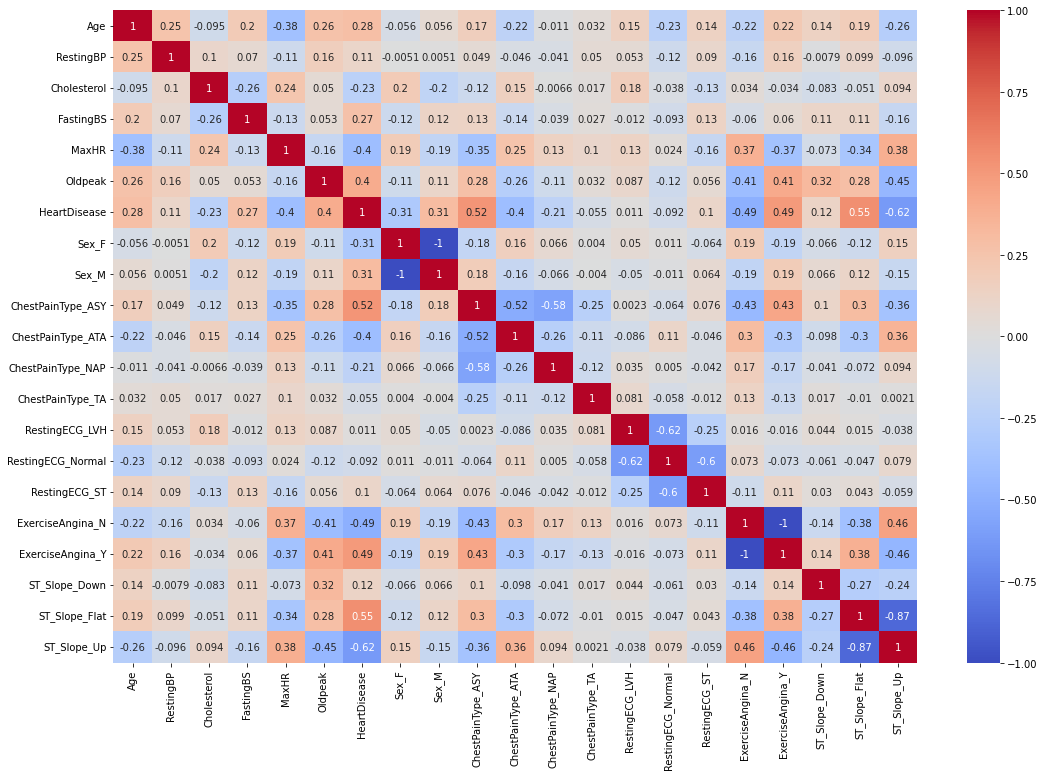

In [66]:
# Calculate the cor matrix
correlation_matrix = dataEncode_rescaled.corr()

# Make a correlation heat map
plt.figure(figsize = (18, 12))
sns.heatmap(correlation_matrix, annot= True, cmap = 'coolwarm', center = 0)
plt.show()

In [ ]:
# Age has a negative correlation with Max Heart Rate. We may keep it.
# Chest pain NAP, it has a strong correlation with Chestpaint ASY

In [68]:
# We find no linear correlation between columns
# Select traits with an association between -0.35 and 0.35 with HeartDisease
low_correlation_features = correlation_matrix.index[
    (correlation_matrix['HeartDisease'] > -0.35) & (correlation_matrix['HeartDisease'] < 0.35)
]
dataEncode_rescaled_reduced = dataEncode_rescaled.drop(columns=low_correlation_features)
dataEncode_rescaled_reduced


,MaxHR,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,0.788732,0.295455,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.676056,0.409091,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.267606,0.295455,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.338028,0.465909,1.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.436620,0.295455,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
913,0.507042,0.431818,1.0,0.0,0.0,1.0,0.0,1.0,0.0
914,0.570423,0.681818,1.0,1.0,0.0,1.0,0.0,1.0,0.0
915,0.387324,0.431818,1.0,1.0,0.0,0.0,1.0,1.0,0.0
916,0.802817,0.295455,1.0,0.0,1.0,1.0,0.0,1.0,0.0


In [69]:
processed_data = dataEncode_rescaled_reduced

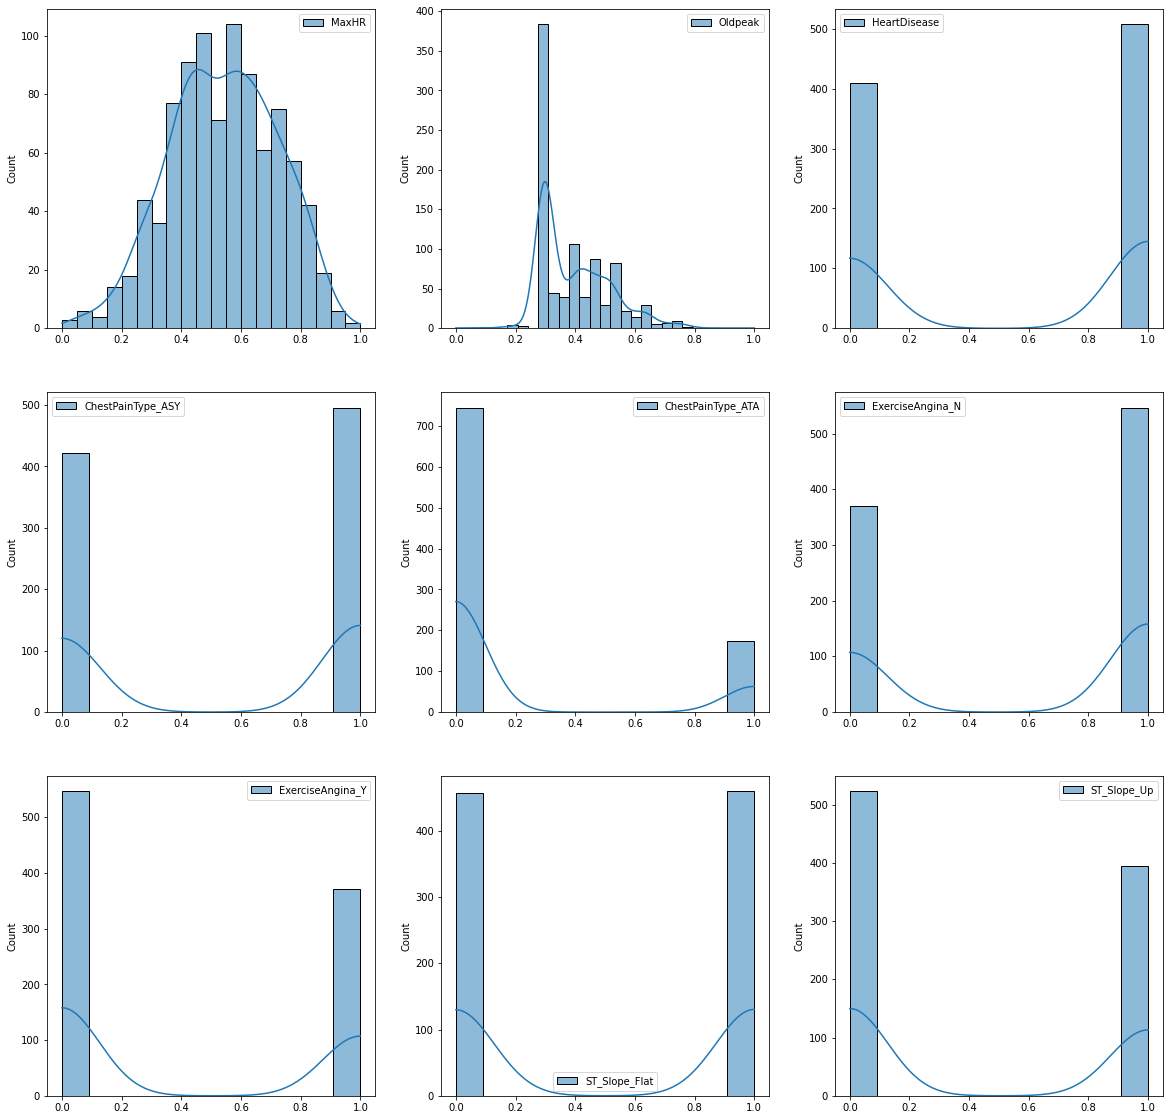

In [72]:
# Distribution Plot
fig, axes = plt.subplots(3,3, figsize=(20,20))
axes = axes.flatten()

# Loop to create subplots
i = 0
for item in processed_data.items():
    sns.histplot(item, kde=True, ax=axes[i])
    i+=1

plt.show()

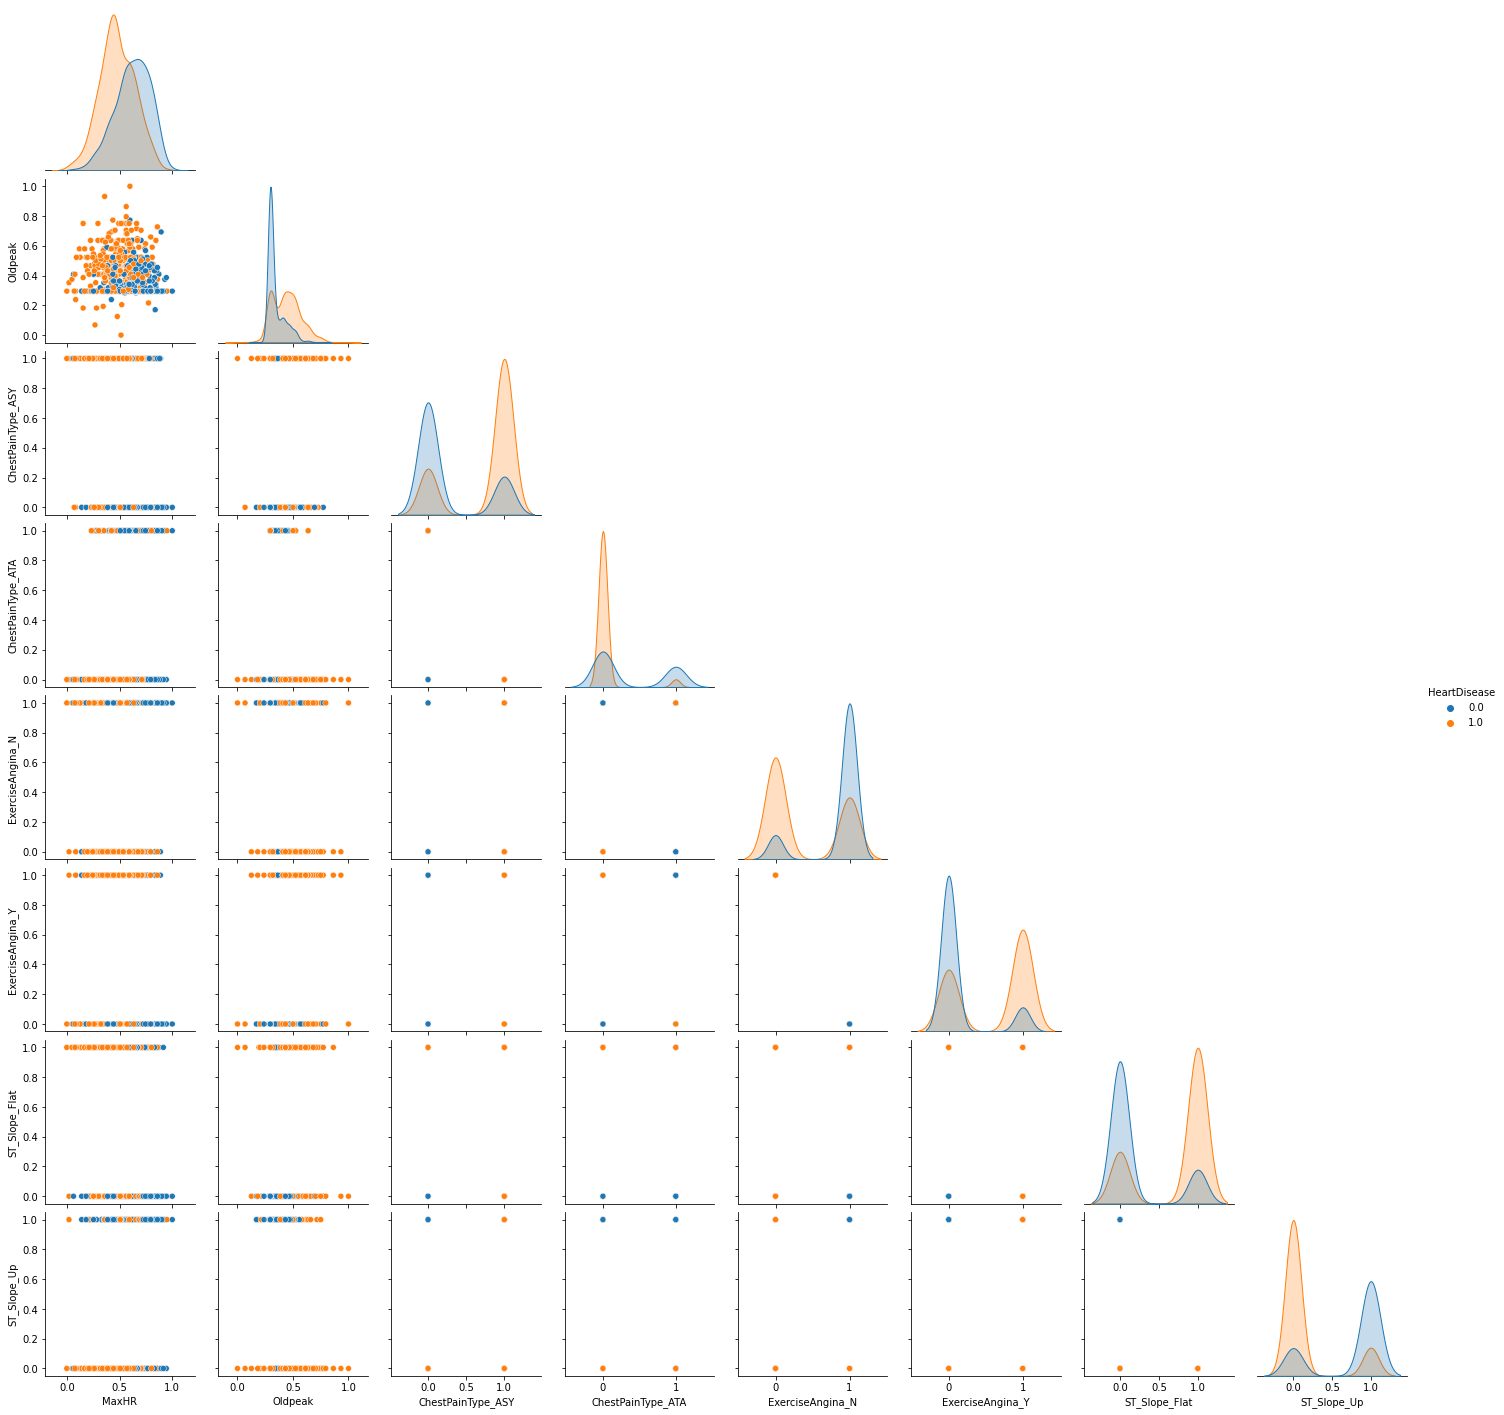

In [73]:
# Pair plot
sns.pairplot(data=processed_data, hue="HeartDisease", corner=True) 
plt.show()

In [94]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(dataEncode_rescaled['HeartDisease'], dataEncode_rescaled['ChestPainType_TA'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("P-value:", p)

Chi-square statistic: 2.273802131399089
P-value: 0.13157675122814322
